In [5]:
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plot
import seaborn as seaborn
%matplotlib inline 


In [6]:
new_names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
data = pandas.read_csv("./breast-cancer-wisconsin.data", names=new_names)
data.head(4)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
print(data["Bare Nuclei"])

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object


In [9]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    for j in data["Bare Nuclei"]:
        if not j.isnumeric():
            print(j)

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


In [10]:
data["Bare Nuclei"] = pandas.to_numeric(data["Bare Nuclei"], errors="coerce")
print(data["Bare Nuclei"])
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
    for j in data["Bare Nuclei"]:
        print(j)

0       1.0
1      10.0
2       2.0
3       4.0
4       1.0
       ... 
694     2.0
695     1.0
696     3.0
697     4.0
698     5.0
Name: Bare Nuclei, Length: 699, dtype: float64
1.0
10.0
2.0
4.0
1.0
10.0
10.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
9.0
1.0
1.0
1.0
10.0
1.0
10.0
7.0
1.0
nan
1.0
7.0
1.0
1.0
1.0
1.0
1.0
1.0
5.0
1.0
1.0
1.0
1.0
1.0
10.0
7.0
nan
3.0
10.0
1.0
1.0
1.0
9.0
1.0
1.0
8.0
3.0
4.0
5.0
8.0
8.0
5.0
6.0
1.0
10.0
2.0
3.0
2.0
8.0
2.0
1.0
2.0
1.0
10.0
9.0
1.0
1.0
2.0
1.0
10.0
4.0
2.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
2.0
9.0
4.0
8.0
10.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
6.0
10.0
5.0
5.0
1.0
3.0
1.0
3.0
10.0
10.0
1.0
9.0
2.0
9.0
10.0
8.0
3.0
5.0
2.0
10.0
3.0
2.0
1.0
2.0
10.0
10.0
7.0
1.0
10.0
1.0
10.0
1.0
1.0
1.0
10.0
1.0
1.0
2.0
1.0
1.0
1.0
nan
1.0
1.0
5.0
5.0
1.0
nan
8.0
2.0
1.0
10.0
1.0
10.0
5.0
3.0
1.0
10.0
1.0
1.0
nan
10.0
10.0
1.0
1.0
3.0
nan
2.0
10.0
1.0
1.0
1.0
1.0
1.0
1.0
10.0
10.0
10.0
1.0
1.0
1.0
10.0
1.0
1.0
1.0
10.0
10.0
1.0
8.0
10.0
8.0
1.0
8.0
10.0
1.0
1.0
1.0
1.0
7.

In [11]:
data["Bare Nuclei"] = data["Bare Nuclei"].replace(numpy.nan, 0, regex=True)
data["Bare Nuclei"] = data["Bare Nuclei"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


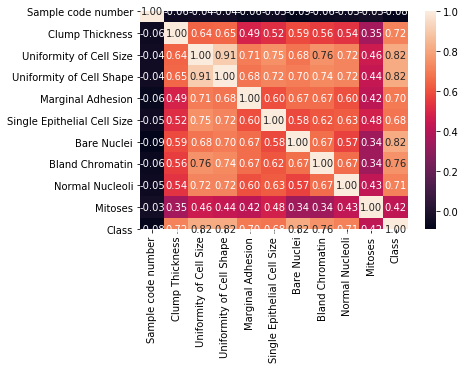

In [12]:
correlations=data.corr()
seaborn.heatmap(correlations, annot=True, fmt='.2f')

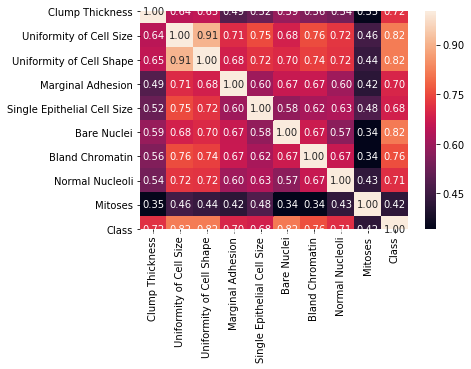

In [13]:
correlations_noid = (correlations.loc[:, correlations.columns != "Sample code number"]).drop("Sample code number")
seaborn.heatmap(correlations_noid, annot=True, fmt='.2f')

In [14]:
print(correlations)

                             Sample code number  Clump Thickness  \
Sample code number                     1.000000        -0.055308   
Clump Thickness                       -0.055308         1.000000   
Uniformity of Cell Size               -0.041603         0.644913   
Uniformity of Cell Shape              -0.041576         0.654589   
Marginal Adhesion                     -0.064878         0.486356   
Single Epithelial Cell Size           -0.045528         0.521816   
Bare Nuclei                           -0.089871         0.589296   
Bland Chromatin                       -0.060051         0.558428   
Normal Nucleoli                       -0.052072         0.535835   
Mitoses                               -0.034901         0.350034   
Class                                 -0.080226         0.716001   

                             Uniformity of Cell Size  \
Sample code number                         -0.041603   
Clump Thickness                             0.644913   
Uniformity of C

In [15]:
correlations.count()

Sample code number             11
Clump Thickness                11
Uniformity of Cell Size        11
Uniformity of Cell Shape       11
Marginal Adhesion              11
Single Epithelial Cell Size    11
Bare Nuclei                    11
Bland Chromatin                11
Normal Nucleoli                11
Mitoses                        11
Class                          11
dtype: int64

In [16]:
used_corr_index = []
interesting_corr_index=[]
for i in correlations:
    for j in correlations.index[correlations[i] > 0.75]:
        # if i != j and i not in used_corr_index and j not in used_corr_index:
        if i != j and [i,j] not in used_corr_index and [j,i] not in used_corr_index:
        #if i != j and [i,j] not in used_corr_index:
            used_corr_index.append([i,j])
            print(correlations[i][correlations.index == j].values[0], "  ", i, "  ", j )
            interesting_corr_index.append([i,j,correlations[i][correlations.index == j].values[0]])
            

0.9068819130526037    Uniformity of Cell Size    Uniformity of Cell Shape
0.7517991298771357    Uniformity of Cell Size    Single Epithelial Cell Size
0.7557209811005803    Uniformity of Cell Size    Bland Chromatin
0.8179037353075628    Uniformity of Cell Size    Class
0.8189337394205302    Uniformity of Cell Shape    Class
0.817652856371102    Bare Nuclei    Class
0.7566161463789082    Bland Chromatin    Class


In [17]:
print(interesting_corr_index)

[['Uniformity of Cell Size', 'Uniformity of Cell Shape', 0.9068819130526037], ['Uniformity of Cell Size', 'Single Epithelial Cell Size', 0.7517991298771357], ['Uniformity of Cell Size', 'Bland Chromatin', 0.7557209811005803], ['Uniformity of Cell Size', 'Class', 0.8179037353075628], ['Uniformity of Cell Shape', 'Class', 0.8189337394205302], ['Bare Nuclei', 'Class', 0.817652856371102], ['Bland Chromatin', 'Class', 0.7566161463789082]]


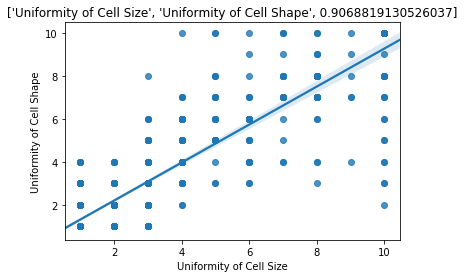

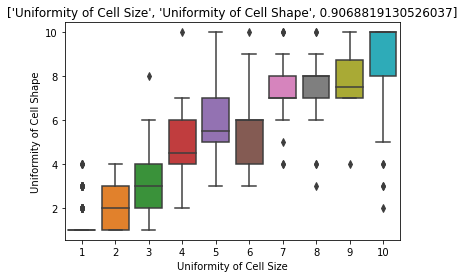

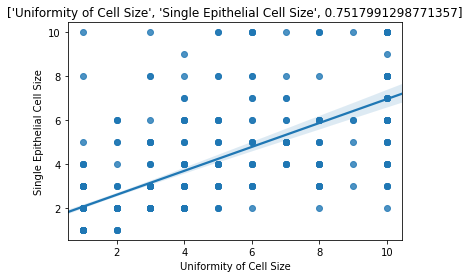

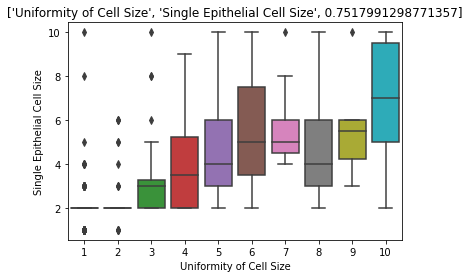

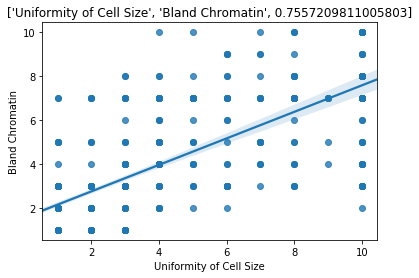

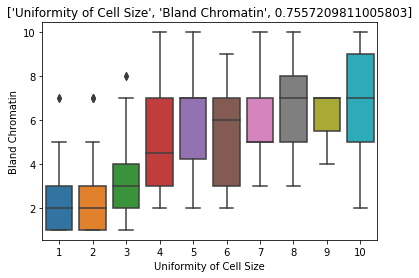

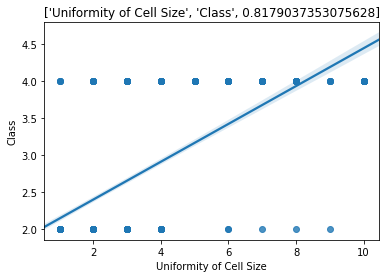

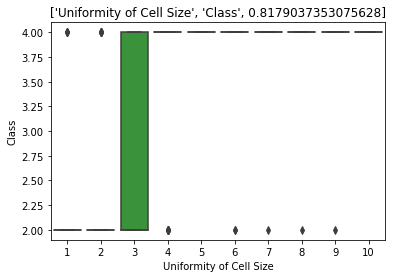

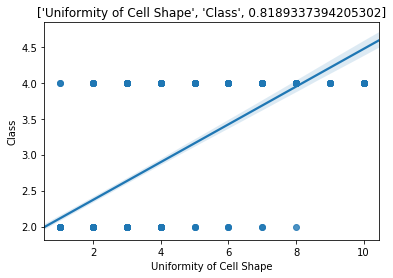

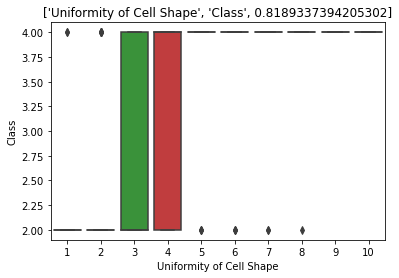

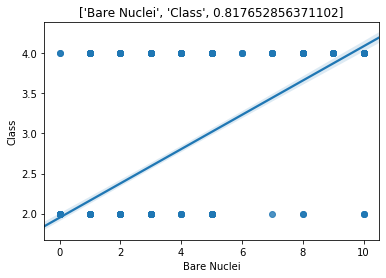

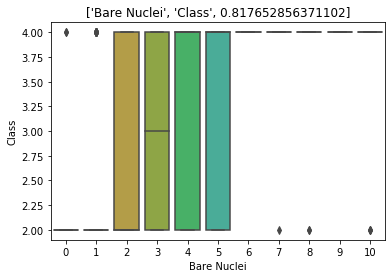

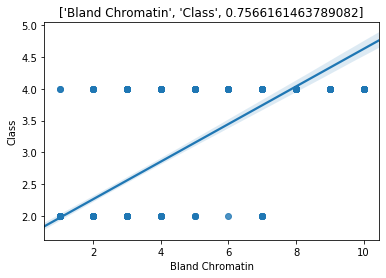

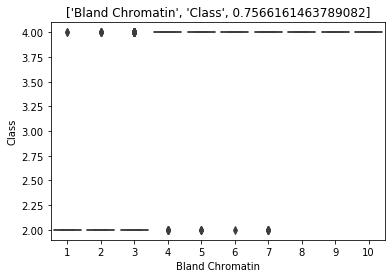

In [18]:
for one in interesting_corr_index:
    plot.figure()
    plot.title(one)
    seaborn.regplot(x=one[0], y=one[1], data=data)
    plot.figure()
    plot.title(one)
    seaborn.boxplot(x=one[0], y=one[1], data=data)
    

In [19]:
data.describe

<bound method NDFrame.describe of      Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
694              776715                3                        1   
695              841769                2                        1   
696              888820                5                       10   
697              897471                4                        8   
698              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1        

In [20]:
data["Uniformity of Cell Size"].value_counts().to_frame()

,Uniformity of Cell Size
1,384
10,67
3,52
2,45
4,40
5,30
8,29
6,27
7,19
9,6


In [21]:
data["Single Epithelial Cell Size"].value_counts().to_frame()

,Single Epithelial Cell Size
2,386
3,72
4,48
1,47
6,41
5,39
10,31
8,21
7,12
9,2


In [22]:
data["Bland Chromatin"].value_counts().to_frame()

,Bland Chromatin
2,166
3,165
1,152
7,73
4,40
5,34
8,28
10,20
9,11
6,10


In [23]:
data["Bare Nuclei"].value_counts().to_frame()

,Bare Nuclei
1,402
10,132
5,30
2,30
3,28
8,21
4,19
0,16
9,9
7,8


In [24]:
data["Class"].value_counts().to_frame()

,Class
2,458
4,241


In [25]:
data["Bland Chromatin"].value_counts().to_frame()

,Bland Chromatin
2,166
3,165
1,152
7,73
4,40
5,34
8,28
10,20
9,11
6,10


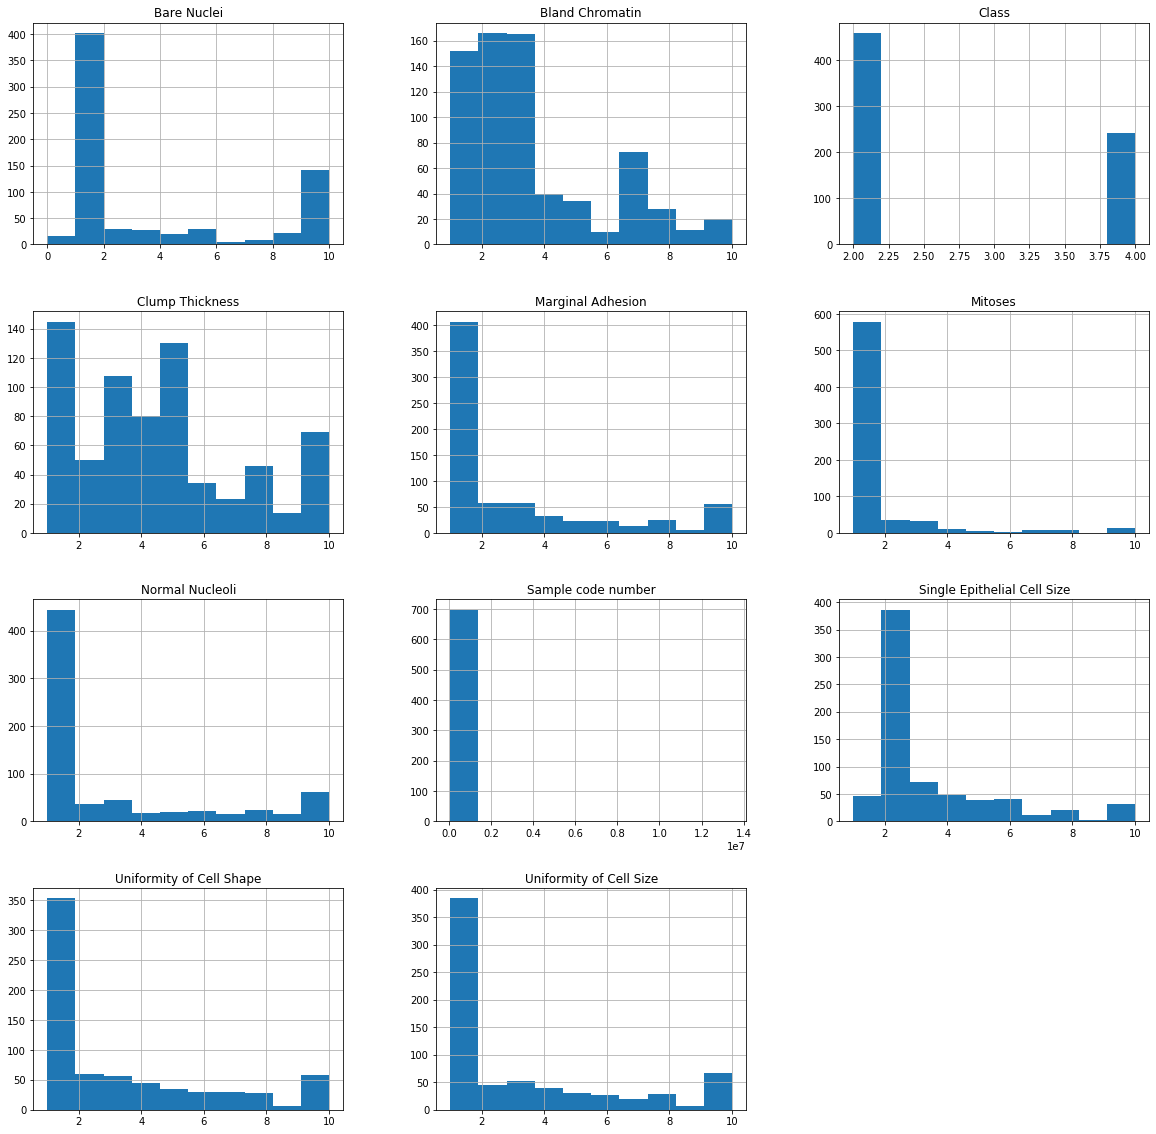

In [28]:
data.hist(figsize=(20,20));

/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/pbedyaev/anaconda2/envs/ml/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


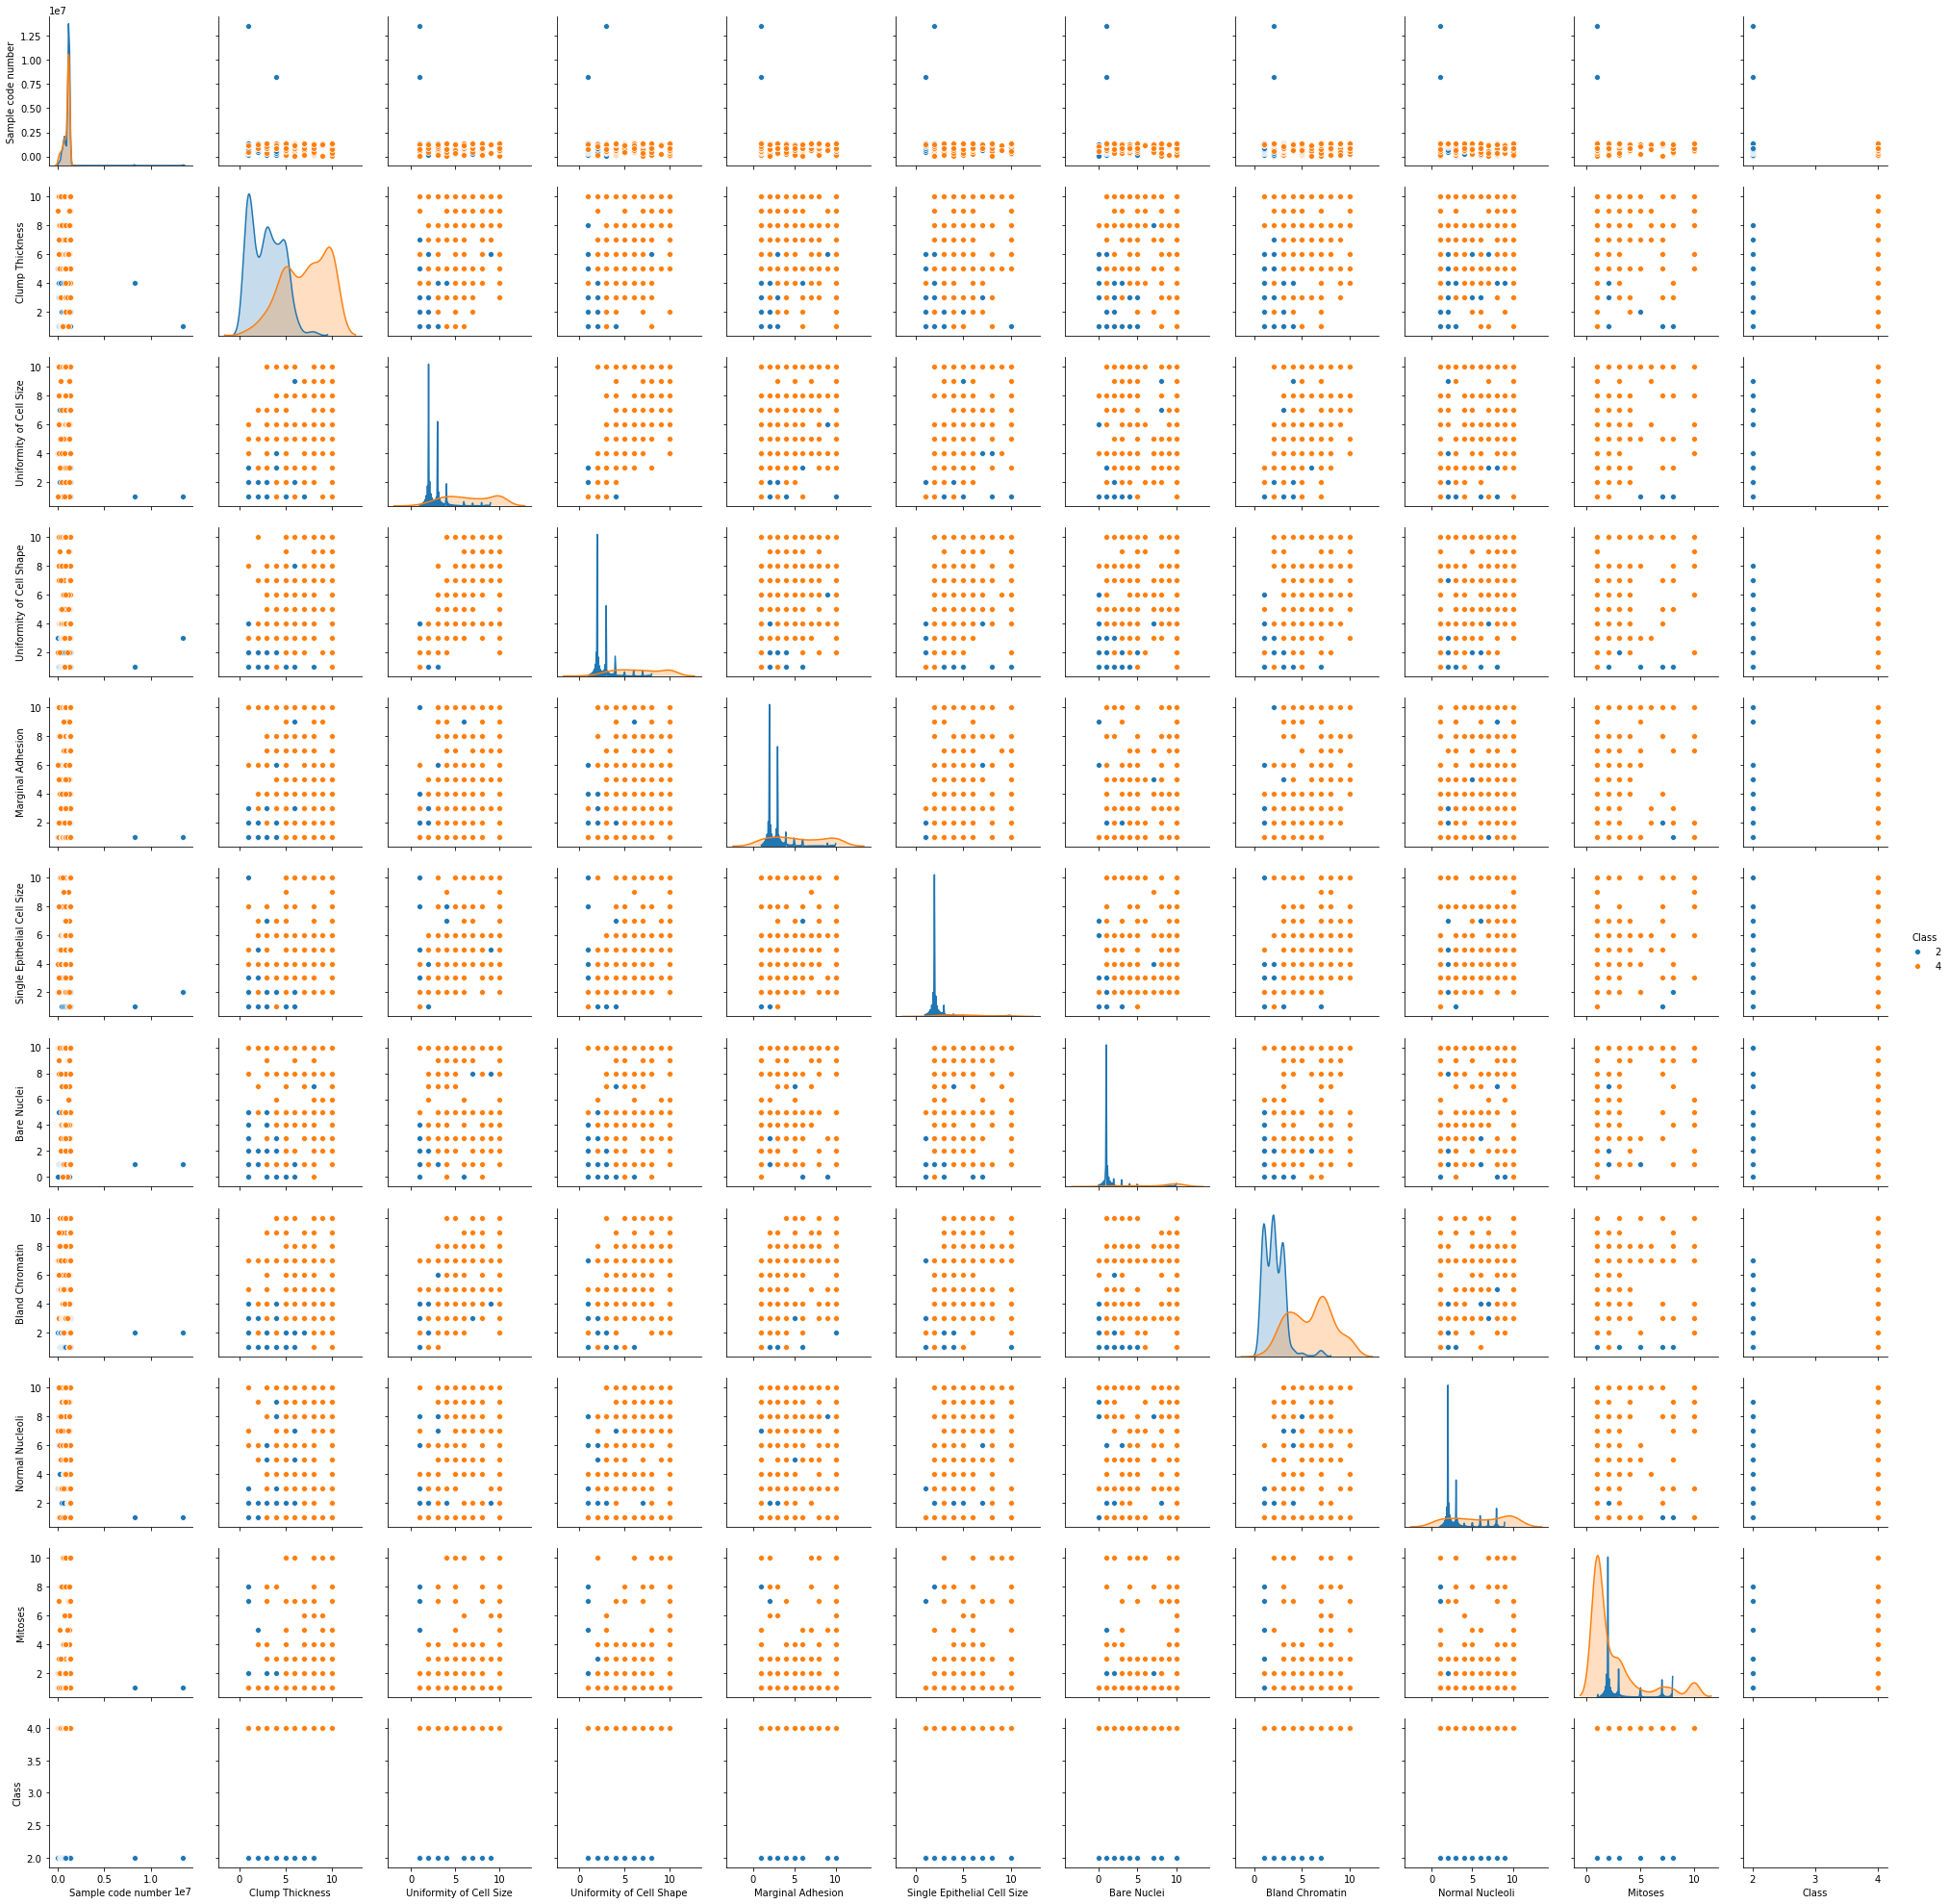

In [29]:
seaborn.pairplot(data, hue="Class");